## Homework 5

### Greedy boss

In [24]:
import matplotlib.pyplot as plt
import math
#import codeskulptor
#codeskulptor.set_timeout(20)

STANDARD = True
LOGLOG = False

# constants for simulation
INITIAL_SALARY = 100
SALARY_INCREMENT = 100
INITIAL_BRIBE_COST = 1000


def greedy_boss(days_in_simulation, bribe_cost_increment, plot_type = STANDARD):
    """
    Simulation of greedy boss
    """
    
    # initialize necessary local variables
    current_day = 0
    current_savings = 0
    total_salary = 0
    current_salary = INITIAL_SALARY
    current_bribe = INITIAL_BRIBE_COST
    
    # define  list consisting of days vs. total salary earned for analysis
    days_vs_earnings = []

    # Each iteration of this while loop simulates one bribe
    while current_day <= days_in_simulation:
        
        # update list with days vs total salary earned
        # use plot_type to control whether regular or log/log plot
        if plot_type == STANDARD:
            days_vs_earnings.append([current_day, total_salary])
        else:
            days_vs_earnings.append([math.log(current_day), math.log(total_salary)])
        
        # check whether we have enough money to bribe without waiting
        if current_savings >= current_bribe:
            days_to_next_bribe = 0
        else:
            time_to_next_bribe = (current_bribe - current_savings) / float(current_salary)
            days_to_next_bribe = math.ceil(time_to_next_bribe)
        
        # advance current_day to day of next bribe (DO NOT INCREMENT BY ONE DAY)
        current_day += days_to_next_bribe

        # update state of simulation to reflect bribe
        current_savings += current_salary * days_to_next_bribe
        current_savings -= current_bribe
        total_salary    += current_salary * days_to_next_bribe
        
        current_salary += SALARY_INCREMENT
        current_bribe  += bribe_cost_increment
   
    return days_vs_earnings


print(greedy_boss(35, 100))
# should print [(0, 0), (10, 1000), (16, 2200), (20, 3400), (23, 4600), (26, 6100), (29, 7900), (31, 9300), (33, 10900), (35, 12700)]

print(greedy_boss(35, 0))
# should print [(0, 0), (10, 1000), (15, 2000), (19, 3200), (21, 4000), (23, 5000), (25, 6200), (27, 7600), (28, 8400), (29, 9300), (30, 10300), (31, 11400), (32, 12600), (33, 13900), (34, 15300), (34, 15300), (35, 16900)]

[[0, 0], [10, 1000], [16, 2200], [20, 3400], [23, 4600], [26, 6100], [29, 7900], [31, 9300], [33, 10900], [35, 12700]]
[[0, 0], [10, 1000], [15, 2000], [19, 3200], [21, 4000], [23, 5000], [25, 6200], [27, 7600], [28, 8400], [29, 9300], [30, 10300], [31, 11400], [32, 12600], [33, 13900], [34, 15300], [34, 15300], [35, 16900]]


### Question 1

Analyzing the Greedy Boss Scenario

In this week's mini-project, we will investigate various strategies for the simple (but popular) game "Cookie Clicker". (If you think Cookie Clicker is silly, just remember that "Farmville" made the founders of Zynga rich.)

As a warmup, this week's Practice Activity, The Case of the Greedy Boss, considers a simple scenario that is very similar to Cookie Clicker in which you can repeatedly bribe your boss to have him increase your salary.

This homework will analyze the behavior of the greedy boss simulator for several simple cases. If you have not taken a look at this practice activity, you should work through it first before attempting this homework.

Use the function run_simulations in the greedy boss simulator to plot the graph of total salary earned as a function of the number of days for bribe_cost_increment = 0, 500, 1000, 2000. Which value for bribe_cost_increment generates the fastest growth in total salary earned in the simulation?

Remember to compare the plots of the functions over roughly the same number of days.

- 0, refer figure below

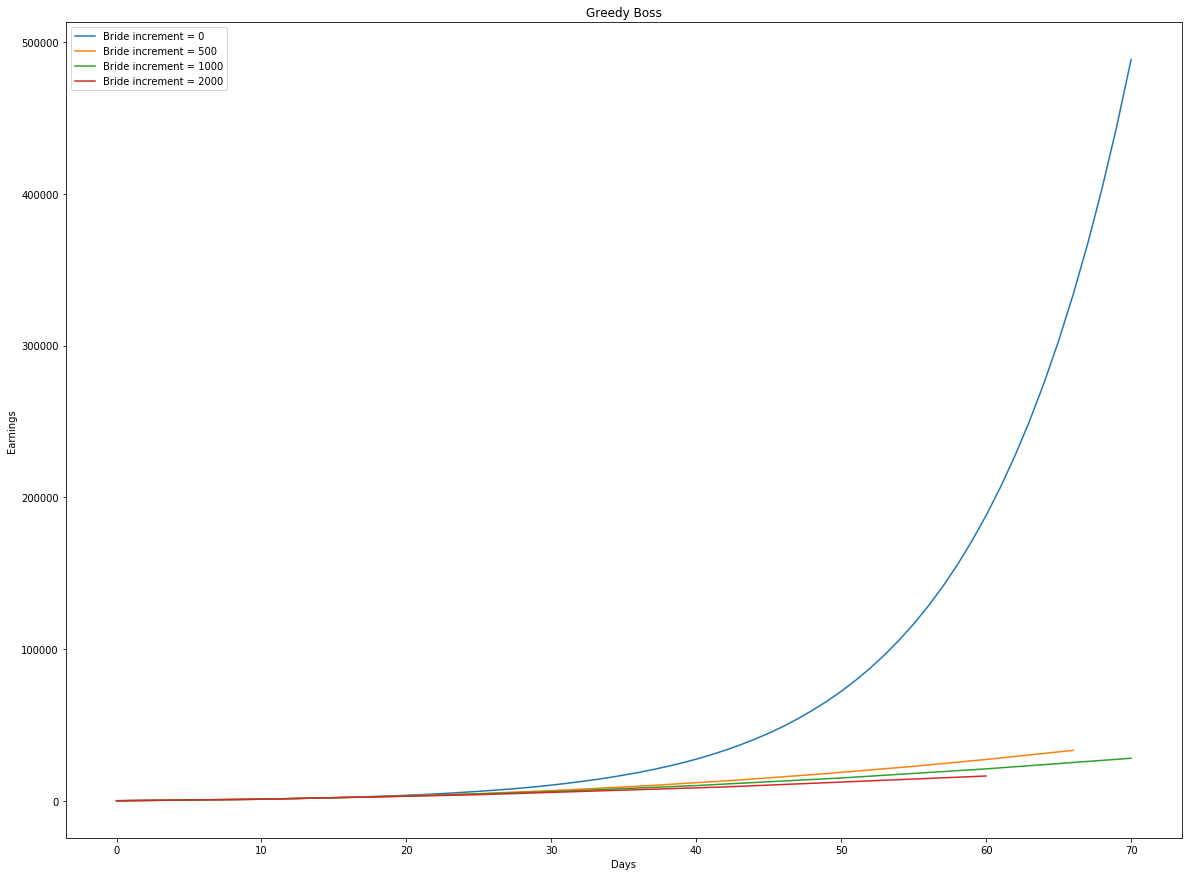

In [14]:
def get_axis(inc):
    
    x_axis = [x for [x, y] in inc]
    y_axis = [y for [x, y] in inc]
    
    return x_axis, y_axis

def run_simulations():
    """
    Run simulations for several possible bribe increments
    """
    plot_type = STANDARD
    days = 70
    inc_0 = greedy_boss(days, 0, plot_type)
    inc_500 = greedy_boss(days, 500, plot_type)
    inc_1000 = greedy_boss(days, 1000, plot_type)
    inc_2000 = greedy_boss(days, 2000, plot_type)
    
    plt.figure(figsize = (20, 15))
    plt.plot(get_axis(inc_0)[0], get_axis(inc_0)[1], label = 'Bride increment = 0')
    plt.plot(get_axis(inc_500)[0], get_axis(inc_500)[1], label = 'Bride increment = 500')
    plt.plot(get_axis(inc_1000)[0], get_axis(inc_1000)[1], label = 'Bride increment = 1000')
    plt.plot(get_axis(inc_2000)[0], get_axis(inc_2000)[1], label = 'Bride increment = 2000')
    
    plt.xlabel('Days')
    plt.ylabel('Earnings')
    plt.title('Greedy Boss')
    
    plt.legend()
    plt.show()
'''
    plt.plot("Greedy boss", 600, 600, "days", "total earnings", 
                          [inc_0, inc_500, inc_1000, inc_2000], False,
                         ["Bribe increment = 0", "Bribe increment = 500",
                          "Bribe increment = 1000", "Bribe increment = 2000"])
'''
run_simulations()

### Question 2

One scenario that the greedy boss simulator does not cover is the situation when you refuse to accept a bribe. Which of the following arithmetic sums evaluates to your total salary earned after d days?

- 100+100+⋯+100+100 (with d terms in sum)

### Question 3

Reduce the arithmetic sum that you selected in Question 2 to a polynomial expression in the number of days d using the rules for arithmetic sums specified in the Math notes. This expression should evaluate to your total salary earned after d days.

- 100 * d

### Question 4

For the next three problems, we will consider the case when **bribe_cost_increment == 1000**. First, convert the output of **greedy_boss()** into Log/Log form by taking the logarithm of both current_day and the total salary earned using math.log() before they appended to the list **days_vs_earnings**.

The plot of the resulting graph approaches a straight line as the number of days increase. This observation signals that the function might be a polynomial function. Compute the slope of this line and round it to the nearest integer to estimate the degree of this polynomial.

In [28]:
import math

input4 = greedy_boss(70, 1000)

input_days = [math.log(x) for [x, y] in input4 if x > 0]
input_earnings = [math.log(y) for [x, y] in input4 if x > 0]

from scipy import stats
import numpy as np

slope, intercept, r_value, p_value, std_err = stats.linregress(input_days,input_earnings)

print(slope)

1.71690232226


### Question 5

Examine the output of the simulation greedy_boss(50, 1000). Note you accumulate enough savings to pay a bribe once every 10 days.

Which of the arithmetic sums below evaluates to the total salary earned after n bribes?

- 1000+2000+3000+...+1000n

### Question 6

Reduce the arithmetic sum that you selected in Question 5 to a closed-form expression in n using the rules for arithmetic sums specified in the Math notes. This expression should relate total salary earned to the number of bribes.

Finally, use the fact that each bribe happens once every 10 days to derive a polynomial expression that approximates the total salary earned in terms of the number of days d. As a check, this expression in d should evaluate exactly to the total salary earned by the end of the day of each bribe.

Enter this expression in d as a math expression below.

 - 50* d *((d/10) + 1)

### Question 7

The next two questions will examine the case when the cost of a bribe does not increase, i.e; bribe_cost_increment == 0. Our first task is to check whether the total salary earned is a polynomial function of the number of days in this case. To this end, create a Log/Log plot of the output of greedy_boss and examine the resulting graph.

Does the graph approach a straight line as the number of days increases?

- No, the graph does not approach a straight line.

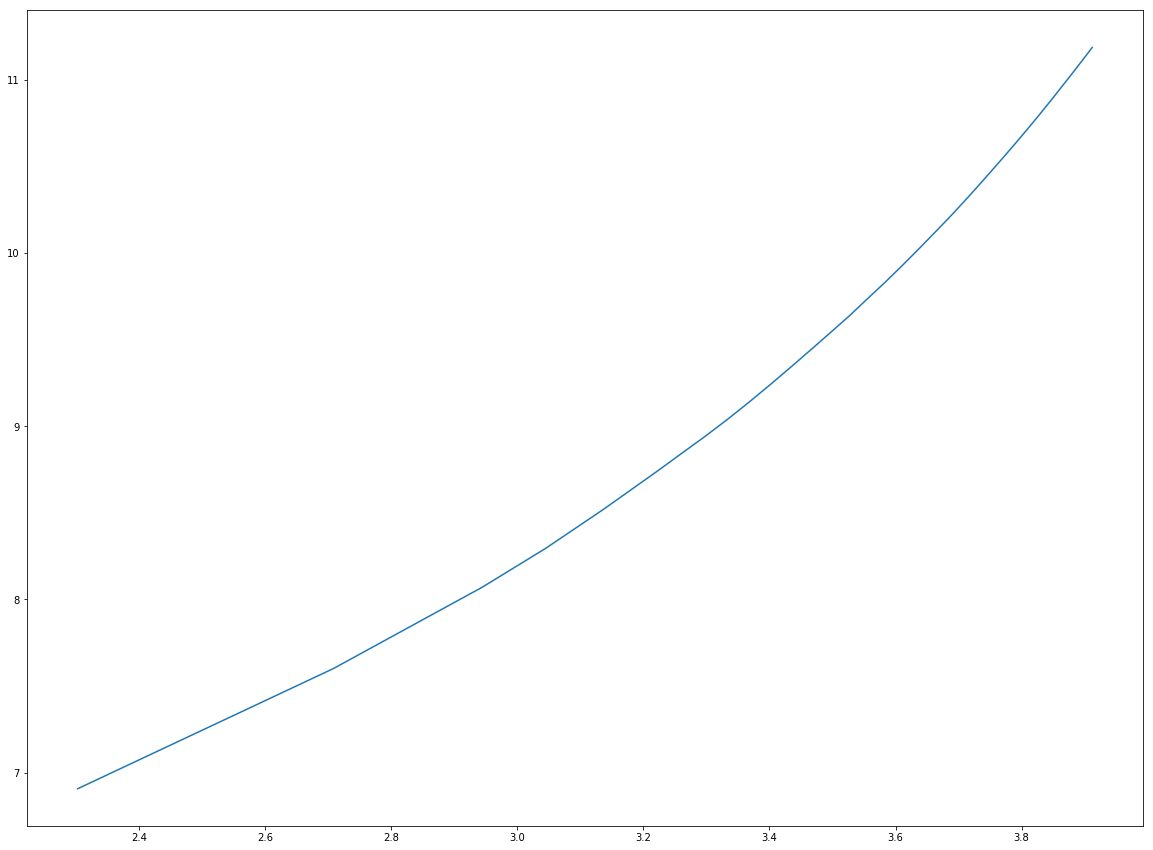

In [33]:
input7 = greedy_boss(50, 0)

input_days = [math.log(x) for [x, y] in input7 if x > 0]
input_earnings = [math.log(y) for [x, y] in input7 if x > 0]

plt.figure(figsize = (20, 15))
plt.plot(input_days, input_earnings, label = 'Bride increment = 0')
plt.show()

### Question 8

To conclude our analysis of this case, we will do some manual experimentation to locate an expression in d that grows at a similar rate to total salary earned when **bribe_cost_increment == 0**.

Compare the growth rates of the expressions below to the growth rate of total salary earned using the plotting technique described in the Math notes. Which expression grows at approximately the same rate as total salary earned?

- e^(0.095*d)

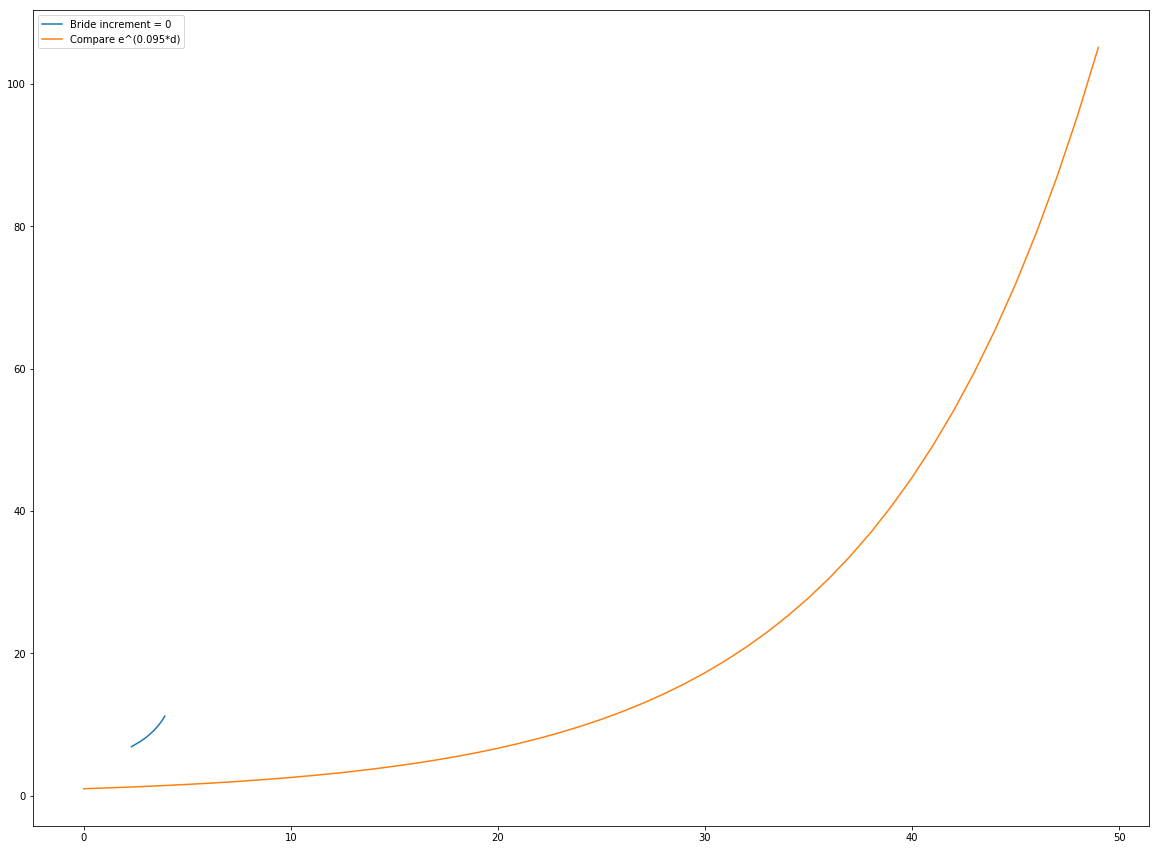

In [40]:
input8 = greedy_boss(50, 0)

input_days = [math.log(x) for [x, y] in input8 if x > 0]
input_earnings = [math.log(y) for [x, y] in input8 if x > 0]

compare_days = range(50)
compare_earnings = [math.exp(0.095 * d) for d in compare_days]

plt.figure(figsize = (20, 15))
plt.plot(input_days, input_earnings, label = 'Bride increment = 0')
plt.plot(compare_days, compare_earnings, label = 'Compare e^(0.095*d)')
plt.legend()
plt.show()

### Question 9

In the next two questions, we will consider a simple version of Cookie Clicker in which there is only one possible upgrade option. Instead of increasing the cost of an upgrade by some fixed amount after each upgrade as done in the greedy boss simulator, each upgrade in Cookie Clicker costs 15% more than the cost of the previous upgrade. (Note that this cost compounds in the same manner that interest does.)

If the first upgrade costs one unit, enter a math expression that models the cost of the nth upgrade.

- 1.15^(n-1)

### Question 10

For the case when bribe_cost_increment == 1000, the cost of the nth bribe was exactly 1000n. Which expression in n grows faster (as defined in the Math notes), 1000n or your answer to question 9?

You may want to plot some examples using SimplePlot for large values of n to help in making this comparison

- The cost of an upgrade in Cookie Clicker grows faster than the cost of a bribe in the greedy boss scenario.

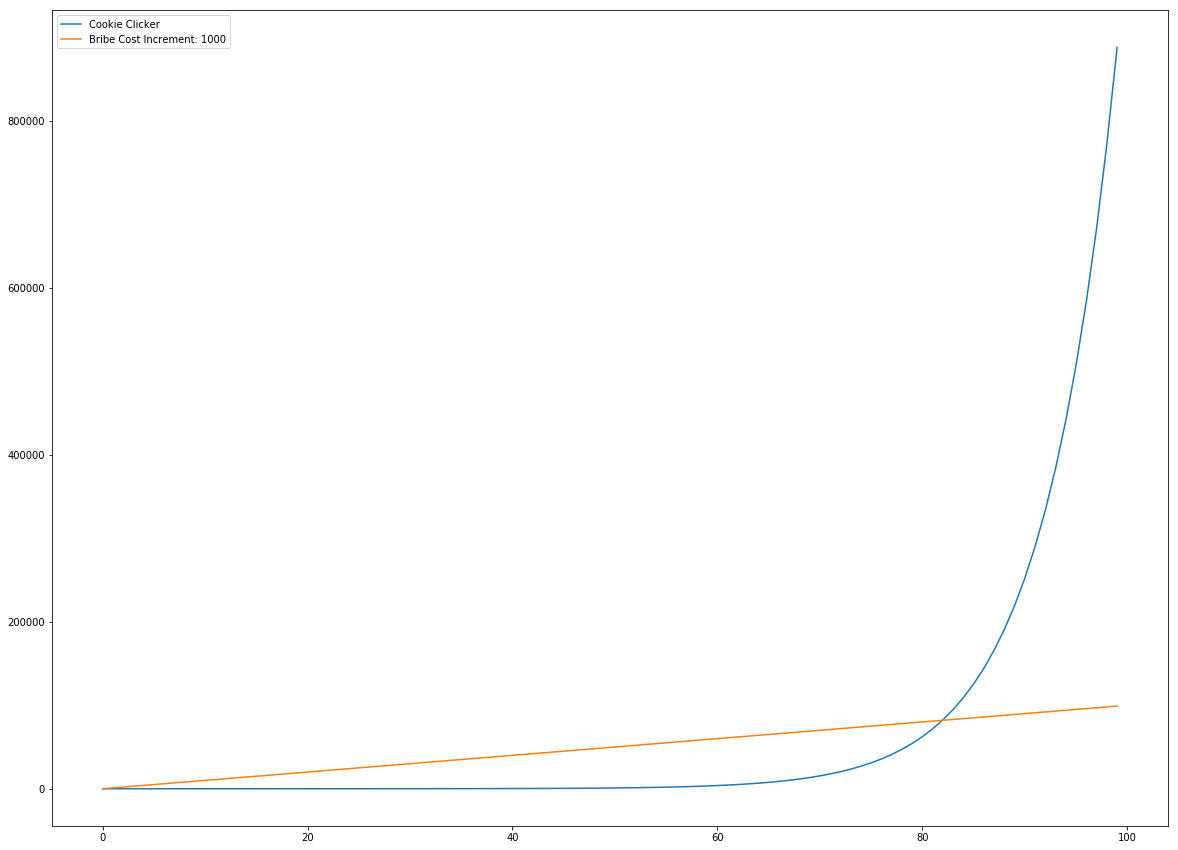

In [45]:
n = range(100)
cost_cc = [1.15 ** (i - 1) for i in n]
cost_bi = [1000 * i for i in n]

plt.figure(figsize = (20, 15))
plt.plot(n, cost_cc, label = 'Cookie Clicker')
plt.plot(n, cost_bi, label = 'Bribe Cost Increment: 1000')
plt.legend()
plt.show()